# Outils de test 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fixedpoint import FixedPoint

In [2]:
def generateurMandelbrot(z_re, z_im, c_re, c_im):
    z2_re = z_re**2
    z2_im = z_im**2
    r2 = z2_re + z_im

    z_re1 = z2_re - z2_im + c_re
    z_im1 = 2 * z_re*z_im + c_im

    # entre chaque calcul tronc n apres la virgule n > m

    return z_re1, z_im1, r2

def iterateur(z_re, z_im, c_re, c_im, limR=4, limIter=100):
    iteration = 0
    r2 = 0
    while((r2 < limR) and (iteration < limIter)):
        (z_re, z_im, r2) = generateurMandelbrot(z_re, z_im, c_re, c_im)
        iteration += 1
    return iteration

In [18]:
xlim = 1024
ylim = 600
limI = 100
figure = np.zeros((xlim,ylim))
xvec = np.linspace(-2,1,xlim)
yvec = np.linspace(-1,1,ylim)


In [19]:
for ix,x in enumerate(xvec):
    for iy,y in enumerate(yvec):
        i = iterateur(0,0,x,y,limIter=limI)
        if(i==limI):  
            figure[ix,iy] = 0
        else:
            figure[ix,iy] = 255


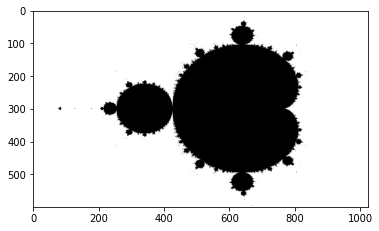

In [20]:
plt.figure()
plt.imshow(figure.T,cmap='gray')
plt.show()

In [21]:
for ix,x in enumerate(xvec):
    for iy,y in enumerate(yvec):
        figure[ix,iy] = iterateur(0,0,x,y,limIter=limI)


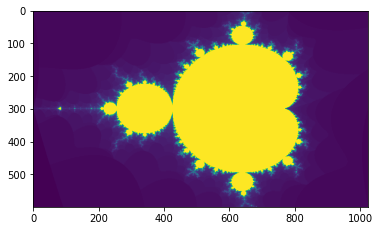

In [24]:
plt.figure()
plt.imshow(figure.T)#,cmap='gray')
plt.title("Virgule flottante")
plt.show()

In [6]:
figure

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

## Passage des fonctions en virgule fixe

In [7]:
# Paramètres importants
m = 4
n = 14

In [8]:
# def resize(x : FixedPoint):
#     print(x.qformat)
#     start =x.n-n
#     end = m + n-1
#     new = f"0b{x.bits[start:end]:0{m+n}b}"
#     print(f"[{start}:{end}] -> {new}")
#     return FixedPoint(new, m=m, n=n, signed=True, str_base=2)
def createFP(v):
    return FixedPoint(v, m=m, n=n, signed=True, str_base=2)

def resize(x : FixedPoint):
    #x_str = str(x)
    x_str = f"{x.bits:0{x.m+x.n}b}"
    new = f"0b{x_str[x.m-m:x.m+n]}"
    #print(f"[{start}:{end}] -> {new}")
    return FixedPoint(new, m=m, n=n, signed=True, str_base=2)

In [9]:
def FP_generateurMandelbrot(z_re : FixedPoint, z_im : FixedPoint, c_re : FixedPoint, c_im : FixedPoint):  
    z2_re = z_re*z_re
    z2_re = resize(z2_re)

    z2_im = z_im*z_im
    z2_im = resize(z2_im)

    r2 = z2_re + z_im
    r2 = resize(r2)

    z_re1_int = z2_re - z2_im   
    z_re1_int = resize(z_re1_int)
    z_re1_int = z_re1_int + c_re
    z_re1 = resize(z_re1_int)

    z_im1_int = 2 * z_re
    z_im1_int = resize(z_im1_int)
    z_im1_int = z_im1_int*z_im
    z_im1_int = resize(z_im1_int)
    z_im1_int = z_im1_int + c_im
    z_im1 = resize(z_im1_int)
    # entre chaque calcul tronc n apres la virgule n > m

    return z_re1, z_im1, r2

def FP_iterateur(z_re, z_im, c_re, c_im, limR=4, limIter=100, save=False):
    iteration = 0
    r2 = 0
    if save:
        tabZ_re = []
        tabZ_im = []
    # prepare for FixedPoint  
    z_re = createFP(z_re)
    z_im = createFP(z_im)
    c_re = createFP(c_re)
    c_im = createFP(c_im)
    limFP = createFP(limR)
    while((r2 < limFP) and (iteration < limIter)):
        (z_re, z_im, r2) = FP_generateurMandelbrot(z_re, z_im, c_re, c_im)
        if save:
            tabZ_re.append(z_re)
            tabZ_im.append(z_im)
        #print(float(r2))
        iteration += 1
    if save:
        return iteration, tabZ_re, tabZ_im
    return iteration

In [10]:
xlim = 100
ylim = 60
limI = 30

figure = np.zeros((xlim,ylim))
xvec = np.linspace(-2,1,xlim)
yvec = np.linspace(-1,1,ylim)

In [11]:
for ix,x in enumerate(xvec):
    for iy,y in enumerate(yvec):
        i = FP_iterateur(0,0,x,y,limIter=limI)
        if(i==limI):  
            figure[ix,iy] = 0
        else:
            figure[ix,iy] = 255

0.0
3.0
4.0
0.0
3.03387451171875
4.03607177734375
0.0
3.06781005859375
4.0758056640625
0.0
3.1016845703125
4.1182861328125
0.0
3.1356201171875
4.16278076171875
0.0
3.16949462890625
4.2083740234375
0.0
3.203369140625
4.25421142578125
0.0
3.2373046875
4.29974365234375
0.0
3.27117919921875
4.343994140625
0.0
3.30511474609375
4.3863525390625
0.0
3.3389892578125
4.42633056640625
0.0
3.37286376953125
4.4630126953125
0.0
3.40679931640625
4.49591064453125
0.0
3.440673828125
4.52459716796875
0.0
3.47454833984375
4.54827880859375
0.0
3.50848388671875
4.56658935546875
0.0
3.5423583984375
4.5791015625
0.0
3.5762939453125
4.58526611328125
0.0
3.61016845703125
4.58489990234375
0.0
3.64404296875
4.5772705078125
0.0
3.677978515625
4.56219482421875
0.0
3.71185302734375
4.53924560546875
0.0
3.74578857421875
4.50848388671875
0.0
3.7796630859375
4.46923828125
0.0
3.81353759765625
4.421630859375
0.0
3.84747314453125
4.36505126953125
0.0
3.88134765625
4.29998779296875
0.0
3.915283203125
4.2255859375
0.0
3.9

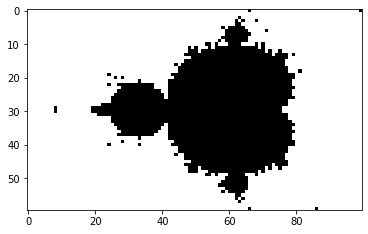

In [12]:
plt.figure()
plt.imshow(figure.T,cmap='gray')
plt.show()

In [13]:
[i,t1_re, t1_im] = FP_iterateur(0,0,-2,0,limIter=limI,save=True)
print(createFP(-2))
print(createFP(0),'\n')
print(t1_re,'\n')
print(t1_im)

0.0
4.0
111000000000000000
000000000000000000 

[FixedPoint('0b111000000000000000', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2), FixedPoint('0b1000000000000000', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2)] 

[FixedPoint('0b0', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2), FixedPoint('0b0', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2)]


In [14]:
[i,t1_re, t1_im] = FP_iterateur(0,0,-1,0.5,limIter=limI,save=True)
print("nb iteration",i)
print(createFP(-1))
print(createFP(0.5),'\n')
print(t1_re,'\n')
print(t1_im)

0.0
1.5
-0.4375
2.16015625
-1.258056640625
7.74639892578125
nb iteration 6
111100000000000000
000010000000000000 

[FixedPoint('0b111100000000000000', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2), FixedPoint('0b111111000000000000', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2), FixedPoint('0b111011010000000000', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2), FixedPoint('0b111111011001000000', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2), FixedPoint('0b110101100001101100', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error',

In [15]:
[i,t1_re, t1_im] = FP_iterateur(0,0,0,0,limIter=limI,save=True)
print(createFP(0))
print(createFP(0),'\n')
print(t1_re,'\n')
print(t1_im)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
000000000000000000
000000000000000000 

[FixedPoint('0b0', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2), FixedPoint('0b0', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2), FixedPoint('0b0', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2), FixedPoint('0b0', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast_alert='warning', str_base=2), FixedPoint('0b0', signed=1, m=4, n=14, overflow='clamp', rounding='convergent', overflow_alert='error', mismatch_alert='warning', implicit_cast